IMPORTING LIBRARIES

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

IMPORTING DATA

In [4]:
# Creating Path
path = r'C:\Users\henry\OneDrive\042025Instacart Basket Analysis'

In [6]:
# importing most up-to-date project data 
df = pd.read_pickle(os.path.join(path, '02 DATA', 'Prepared Data', 'orders_products_customers_aggregated.pkl'))

Create a histogram of the “order_hour_of_day” column.

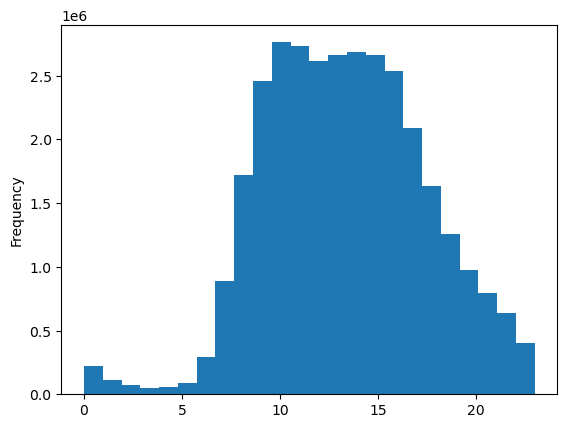

In [9]:
hist = df['order_hour_of_day'].plot.hist(bins = 24)

Customers tend to prefer using Instacart during the late morning and early afternoon hours. The busiest period of the day spans from 8 AM to 4 PM, indicating that most orders are placed during these hours.

Creating a bar chart from the “loyalty_flag” column

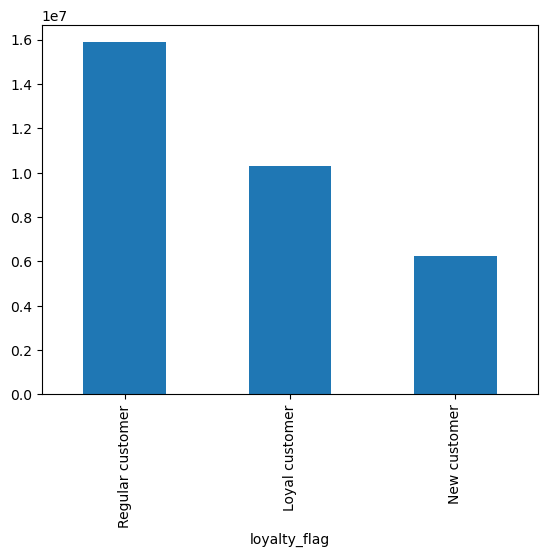

In [13]:
bar = df['loyalty_flag'].value_counts().plot.bar()

Checking whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day.

In [16]:
#creating a sample of the dataframe
sampled_df = df.sample(n=100000, random_state=1)

In [18]:
#group by hour of the day and calculate the mean expenditure
hourly_expenditure = sampled_df.groupby('order_hour_of_day')['prices'].mean().reset_index()

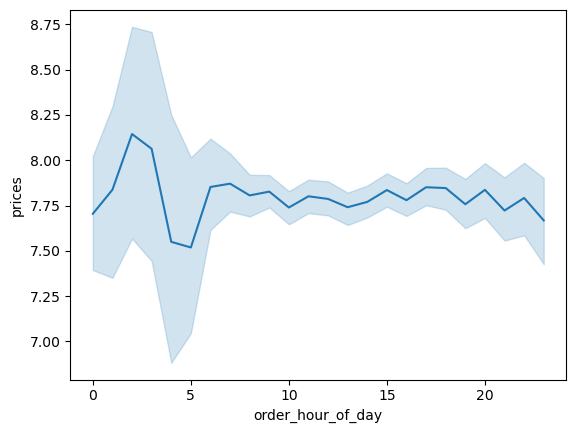

In [20]:
#creating a line chart
line_price_hod = sns.lineplot(data = sampled_df, x = 'order_hour_of_day', y = 'prices')

Connections between age and number of dependents

In [23]:
sampled_df.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'add_to_cart_order', 'reordered', '_merge',
       'price_range_loc', 'busiest_day', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'average_spend', 'spender_flag', 'Customer_frequency',
       'frequency_flag', 'first_name', 'last_name', 'gender', 'state', 'age',
       'date_joined', 'n_dependants', 'marital_status', 'income'],
      dtype='object')

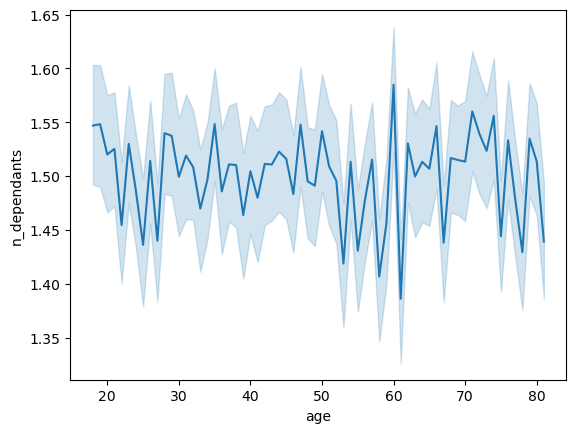

In [29]:
# Creating a line chart from Age and No of Dependants
line_age_nod = sns.lineplot(data = sampled_df, x = 'age', y = 'n_dependants')

The data does not reveal a consistent relationship between age and number of dependents

Connection between age and spending power (income).

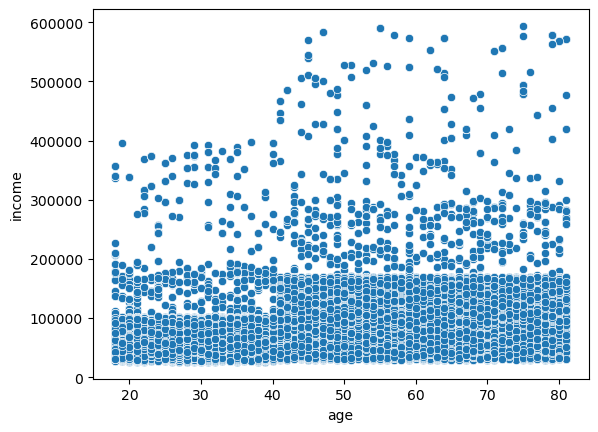

In [34]:
# scatter plot of AGE and INCOME
scatter = sns.scatterplot(data = sampled_df, x='age', y='income')

There's a noticeable jump in income starting at age 40, with many earning significantly more compared to younger age groups.

Exporting visualizations as “.png” files 

In [38]:
# Export Histogram
hist.figure.savefig(os.path.join(path, '04 ANALYSIS','Visualizations', 'hist_order_hour_of_day.png'))

# Export bar chart
bar.figure.savefig(os.path.join(path, '04 ANALYSIS','Visualizations', 'bar_loyalty_flag.png'))

# Export line chart 1 
line_price_hod.figure.savefig(os.path.join(path, '04 ANALYSIS','Visualizations', 'line_price_hour_of_day.png'))

# Export Line chart - connections between age and number of dependents
line_age_nod.figure.savefig(os.path.join(path, '04 ANALYSIS','Visualizations', 'age_and_n_dependents.png'))

# Export scatterplot - connection between age and spending power (income)
scatter.figure.savefig(os.path.join(path, '04 ANALYSIS','Visualizations', 'scatterplot_age_spending_power.png'))